<a href="https://colab.research.google.com/github/joaomarcelofc/datascience/blob/main/Google_Colab1_Panorama_do_COVID_19_no_Brasil_e_no_mundo_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil e no mundo

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil e no mundo, iremos realizar algumas análises sobre os dados públicos da doença com dados que compreendem desde os primeiros casos, até os dias atuais, uma vez que a base de dados utilizada é atualizada frequentemente. Dentre estas análises, iremos verificar o total de casos, evolução de óbitos, proporções, distribuição geográfica, considerando os dados do mundo, e compartamento desses dados após o início das vacinações contra a COVID-19.

### Obtenção dos dados

Nosso conjunto de dados analisado neste notebook é uma coleção dos dados COVID-19 mantidos pelo *Our World in Data*, 
publicação científica online que se concentra em grandes problemas globais, como pobreza, doenças, fome, mudanças climáticas, guerra, riscos existenciais e desigualdade. Estes dados são atualizados frequentemente durante a pandemia, conforme evolução dos números, que são levantados diariamente. Se trata de um dataset bastante completo, com muitas informações pertinentes relacionadas ao COVID-19.

Por se tratar de uma doença nova, recém descoberta, evidentemente nosso dataset pode apresentar países com dados estatísticos deficientes e, até mesmo manipulados em alguns casos. Por mais absurdo que pareça, é realidade que muitas nações não divulgam os números, e omitem essas informações, até mesmo para a sua população. Os motivos dessa omissão não são muito claros, mas segue diretrizes do governo e entendimentos de suas autoridades, da conveniência destes dados publicados. O fato é que a pandamia da COVID 19 gera impactos sociais, econômicos, culturais e políticos, em todo o cenário global. O que observamos no auge da pandemia, em 2020 e 2021, em alguns casos, é que muitas nações não divulgam estes números em detrimento da continuidade de suas atividades econômicas, seguindo um comportamento de total aversão ao isolamento social, uma das principais medidas de contenção da pandemia afim de se evitar a disseminação da doença.  Não é objetivo do nosso notebook realizar nenhum tipo de estudo visando julgamento a uma outra medida, mas estes fatos devem ser mencionados. O motivo da omissão na divulgação de dados por governos federais, estaduais e demais entidades é algo bastante complexo e que não será objeto de estudo deste documento.

Antes de iniciarmos nosso trabalho, primeiramente iremos importar os pacotes necessários para processar e analisar os dados. Para este projeto, iremos utilizar os pacotes *pandas, matplotlib, numpy, bar_chart_race, datetime, json e folium*. Importamos também o *warnings* para ignorar erros que aparecem ao plotar alguns gráficos. 

In [1]:
#!pip install json

In [2]:
! pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 23.3 MB/s 


In [3]:
! pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bar_chart_race as bcr
import datetime as dt
import seaborn as sns
import json
import folium
import warnings
warnings.filterwarnings('ignore')

In [5]:
# importando o dataset COVID-19 para um DataFrame
end = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(end)

### Análise exploratória dos dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados. Posteriormente, iremos realizar análises através de gráficos, de forma a visualizar e interpretar melhor as informações que os dados nos fornecem.

#### Dicionário das variáveis

Abaixo, apresentamos um dicionário de variáveis do dataset analisado. As informações completas, contendo inclusive a fonte destes dados, podem ser localizadas [aqui](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

O resumo abaixo é para facilitar nossa primeira análise, por esse dataset ser um pouco mais extenso, com um número maior de informações.

* `iso_code` - padrão de código da ISO 3166 para representação da divisão administrativa de um país
* `continent` - continente
* `location`- país
* `date` - data da observação
* `total_cases`- total de casos de COVID 19 confirmados, incluindo os casos prováveis, quando reportados
* `new_cases`- novos casos confirmados de COVID 19
* `new_cases_smoothed` - novos casos confirmados de COVID 19, considerando suavização estatística
* `total_deaths` - total de mortes atribuídas ao COVID 19, incluindo os casos prováveis, quando reportados
* `new_deaths` - número de mortes por COVID 19 apontado na data da observação
* `new_deaths_smoothed` - número de mortes apontado na data da observação, considerando suavização estatística
* `total_cases_per_million` - total de casos de COVID 19 por milhão de habitantes, incluindo casos prováveis, quando reportados
* `new_cases_per_million` - novos casos confirmados de COVID 19 por milhao de habitantes
* `new_cases_smoothed_per_million` - novos casos confirmados de COVID 19 por milhao de habitantes, considerando suavização estatística
* `total_deaths_per_million` - total de mortes atribuídas ao COVID 19 por milhão de habitantes
* `new_deaths_per_million` - número de mortes por COVID 19 apontado na data da observação por milhão de habitantes
* `new_deaths_smoothed_per_million` - - número de mortes por COVID 19 apontado na data da observação por milhão de habitantes, considerando suavização estatística
* `reproduction_rate` - número efetivo de reprodução R do COVID 19, que determina o potencial de propagação do vírus
* `icu_patients` - número de pacientes com COVID 19 em unidade de terapia itensiva (UTI), na data da observação
* `icu_patients_per_million` - número de pacientes com COVID 19 em unidade de terapia itensiva (UTI), na data da observação, por milhão de habitantes
* `hosp_patients` - número de pacientes com COVID 19 hospitalizados, na data da observação.
* `hosp_patients_per_million` - número de pacientes com COVID 19 hospitalizados, na data da observação, por milhão de habitantes
* `weekly_icu_admissions` - número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana (data de notificação e 6 dias anteriores)
* `weekly_icu_admissions_per_million` - número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana, por milhão de habitantes
* `weekly_hosp_admissions` - número de pacientes com COVID-19 recém-hospitalizados em uma determinada semana (data de notificação e 6 dias anteriores)
* `weekly_hosp_admissions_per_million` - número de pacientes com COVID-19 recém-hospitalizados em uma determinada semana (data de notificação e 6 dias anteriores), por milhão de habitantes
* `total_tests`- total de testes para COVID 19 realizados até a data da observação
* `new_tests` - número de testes para COVID 19 realizados na data da observação
* `total_tests_per_thousand` - total de testes para COVID 19 realizados na data da observação, por mil habitantes
* `new_tests_per_thousand` - número de testes para COVID 19 realizados na data da observação, por mil habitantes
* `new_tests_smoothed` - número de testes para COVID 19 realizados na data da observação, considerando suavização estatística
* `new_tests_smoothed_per_thousand` - número de testes para COVID 19 realizados na data da observação, considerando suavização estatística, por mil habiantes
* `positive_rate` - parcela de testes COVID-19 positivos, dada como uma média contínua de 7 dias 
* `tests_per_case` - parcela de testes realizadas para cada caso confirmado de COVID 19, considerando uma média contínua de 7 dias
* `tests_units`- Unidades usadas pelo local para relatar seus dados de teste
* `total_vaccinations`- número total de doses de vacina COVID-19 administradas
* `people_vaccinated` - número total de pessoas que receberam, pelo menos, uma dose da vacina
* `people_fully_vaccinated` - número total de pessoas que receberam todas as doses prescritas pelo protocolo inicial de vacinação
* `total_boosters` - número total de doses de reforço de vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo inicial de vacinação)
* `new_vaccinations` - novas doses de vacina da COVID-19 administradas (calculadas apenas para dias consecutivos)
* `new_vaccinations_smoothed`- novas doses de vacina da COVID-19 administradas (calculadas apenas para dias consecutivos), considerando suavização estatística.
* `total_vaccinations_per_hundred` - número total de doses de vacina COVID-19 administradas, por cem habitantes
* `people_vaccinated_per_hundred` - número total de pessoas que receberam, pelo menos, uma dose da vacina, por cem habitantes
* `people_fully_vaccinated_per_hundred` - - número total de pessoas que receberam todas as doses prescritas pelo protocolo inicial de vacinação, por cem habitantes
* `total_boosters_per_hundred` - número total de doses de reforço de vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo inicial de vacinação), por cem habitantes
* `new_vaccinations_smoothed_per_million` - novas doses de vacina da COVID-19 administradas (calculadas apenas para dias consecutivos), considerando suavização estatística, por milhão de habitantes 
* `new_people_vaccinated_smoothed` - número diário de pessoas que recebem sua primeira dose de vacina, considerando suavização estatística
* `new_people_vaccinated_smoothed_per_hundred` - número diário de pessoas que recebem sua primeira dose de vacina, considerando suavização estatística, por cem habitantes
* `stringency_index` - indice de Rigidez de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibição de viagens, reescalonado para um valor de 0 a 100 (100 = resposta mais rigorosa)
* `population`- população (conforme últimos dados disponíveis)
* `population_density`- densidade demográfica, medida expressa pela relação entre a população e a superfície do território.
* `median_age` - idade média da população, conforme projeção da ONU para 2020
* `aged_65_older` - parcela da popuação com 65 anos de idade ou mais
* `aged_70_older` - parcela da popuação com 70 anos de idade ou mais
* `gdp_per_capita` - PIB per capita, produto interno bruto, dividido pela quantidade de habitantes de um país
* `extreme_poverty` - percentual da população que vive em extrema pobreza
* `cardiovasc_death_rate` - taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100.000 pessoas)
* `diabetes_prevalence` - prevalência de diabetes (% da população de 20 a 79 anos) em 2017
* `female_smokers` - proporção de mulheres fumantes
* `male_smokers` - proporção de homens fumantes
* `handwashing_facilities` - percentagem da população com instalações básicas para lavagem das mãos nas instalações, ano mais recente disponível
* `hospital_beds_per_thousand` - leitos hospitalares por mil habitantes
* `life_expectancy` - expectativa de vida
* `human_development_index` - IDH - indice de desenvolvimento humano, medida comparativa usada para classificar os países pelo seu grau de desenvolvimento humano.
* `excess_mortality_cumulative_absolute` - diferença cumulativa entre o número relatado de óbitos desde 1 de janeiro de 2020 e o número projetado de óbitos para o mesmo período com base em anos anteriores
* `excess_mortality_cumulative`- Diferença percentual entre o número acumulado de mortes desde 1 de janeiro de 2020 e as mortes cumulativas projetadas para o mesmo período com base em anos anteriores.
* `excess_mortality` - diferença percentual entre o número relatado de mortes semanais ou mensais em 2020-2021 e o número projetado de mortes para o mesmo período com base em anos anteriores.
* `excess_mortality_cumulative_per_million` - Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período com base em anos anteriores, por milhão de habitantes


#### Visualizando as cinco primeiras e cinco últimas entradas
Após importarmos nosso dataset e atribuirmos o dataframe a uma variável, o primeiro passo é verificarmos as primeiras e últimas entradas dos nossos dados, através dos métodos df.head() e df.tail(). Como nosso *dataset* possui 67 variáveis ao todo, iremos realizar o comando pd.set_option('display.max_columns', None) para visualizarmos todas as colunas. Sem executá-lo, o jupyter notebook irá ocultar algumas informações exibidas.

In [6]:
# utilizamos o pd.set_ooption para mostrar todas as colunas
pd.set_option('display.max_columns', None)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
211361,ZWE,Africa,Zimbabwe,2022-08-21,256624.0,8.0,12.143,5592.0,0.0,0.571,16045.494,0.500,0.759,349.642,0.000,0.036,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
211362,ZWE,Africa,Zimbabwe,2022-08-22,256628.0,4.0,12.000,5592.0,0.0,0.571,16045.745,0.250,0.750,349.642,0.000,0.036,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
211363,ZWE,Africa,Zimbabwe,2022-08-23,256628.0,0.0,9.571,5592.0,0.0,0.571,16045.745,0.000,0.598,349.642,0.000,0.036,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
211364,ZWE,Africa,Zimbabwe,2022-08-24,256628.0,0.0,9.000,5592.0,0.0,0.571,16045.745,0.000,0.563,349.642,0.000,0.036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
211365,ZWE,Africa,Zimbabwe,2022-08-25,256675.0,47.0,13.714,5593.0,1.0,0.571,16048.683,2.939,0.857,349.704,0.063,0.036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


#### Verificando o tamanho do *dataset*

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui, através do método df.shape. Utilizamos os indexadores para selecionar o número de linhas (total de entradas) e o número de colunas (total de variáveis).

In [8]:
# Identificando o volume de dados
print(f'Total de entradas: {df.shape[0]}')
print(f'Total de variáveis: {df.shape[1]}')

Total de entradas: 211366
Total de variáveis: 67


#### Verificando informação dos dados e tipo das variáveis

Vamos analisar também o tipo de cada variável, através do método df.info().

In [9]:
# Verificando o tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211366 entries, 0 to 211365
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    211366 non-null  object 
 1   continent                                   199161 non-null  object 
 2   location                                    211366 non-null  object 
 3   date                                        211366 non-null  object 
 4   total_cases                                 202822 non-null  float64
 5   new_cases                                   202597 non-null  float64
 6   new_cases_smoothed                          201420 non-null  float64
 7   total_deaths                                184046 non-null  float64
 8   new_deaths                                  184014 non-null  float64
 9   new_deaths_smoothed                         182842 non-null  float64
 

Conforme documentado acima, nosso *dataset* apresenta dados dos tipos float (float64) e str (object). Uma observação interessante a ser feita é que os dados da variável date estão como string. Isso ocorre pois, quando alguns arquivos do tipo csv são importados e um quadro de dados é criado, os objetos de data e hora no arquivo são lidos como um objeto de string em vez de um objeto de data e hora e, portanto, é muito difícil realizar operações como a diferença de horário, data, mês e ano, em uma string em vez de um objeto de data e hora .

Mais adiante iremos utilizar o método Pandas to_datetime() para converter a string Date time em um objeto Date time do Python.

#### Analisando dados ausentes do *dataset*

A falta de dados é provavelmente um dos problemas mais comuns ao trabalhar com conjuntos de dados reais. Os dados podem estar ausentes por vários motivos incluindo falha do sensor, gerenciamento inadequado de dados e até mesmo erro humano. O mais importante é analisar o impacto destes dados ausentes nas análises que estão sendo feitas e o quanto são significativos em comparação ao total de dados do *dataset*.

Iremos verificar a representatividade desses dados ausentes em relação ao total de dados do dataset através dividindo a soma de valores nulos por variável pelo total de linhas do dataset.

In [10]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

weekly_icu_admissions_per_million          96.721800
weekly_icu_admissions                      96.721800
excess_mortality_cumulative_per_million    96.625285
excess_mortality_cumulative                96.625285
excess_mortality_cumulative_absolute       96.625285
                                             ...    
total_cases                                 4.042277
population                                  0.590445
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64

Conforme verificamos acima, nosso dataset possui muitos dados nulos, a maior parte deles está concentrada em dados de diferença do número relatado de óbitos de número projetado para o período, números de pacientes hospitalizados e admitidos em unidades de terapia intensiva e dados de vacinação, entre outros. 

Como as vacinas para COVID 19 se iniciaram apenas no final de 2020, início de 2021, todos os dados relacionados a vacinação estarão ausentes até este período. Os motivos da ausência dos demais dados, conforme documentado no início desse notebook, podem ser diversos, e podem estar diretamente relacionados à política e diretrizes de divulgação e comunicação de cada país. Mais uma vez, não será objetivo deste trabalho analisar mais detalhadamente esses dados ausentes.  

O que faremos nas análises posteriores é desconsiderar grande parte destes dados ausentes, e até mesmo completar alguns dados com informações faltantes, como total de mortes, e total de casos com zero, para que nossa análise como um todo não fique prejudicada

Como vimos ao analisar o tipo das variáveis, verificamos que a coluna `date` não está em formato datetime. Para que possamos explorar essa variável ao máximo, vamos transformá-la para o formato datetime.

In [11]:
# verificando a data mais recente do dataset
# formatando coluna date para datetime
pd.DataFrame(df['date']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211366 entries, 0 to 211365
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    211366 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [12]:
df.date = pd.to_datetime(df.date)

In [13]:
pd.DataFrame(df.date).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211366 entries, 0 to 211365
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    211366 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.6 MB


#### Total de casos - ranking de países

Agora iremos verificar quais países lideram em total de casos de COVID-19 em uma determinada data. Como critério para nossa análise utilizaremos o último mês com informações disponíveis, que, no momento em que estamos fazendo este trabalho é o mês de Julho de 2022. Portanto iremos localizar no nosso dataframe as informações de cada país na data-base de 31/07/2022.

Verificando o nosso dataset observamos que ele já tem uma coluna com o total de casos sumarizados por dia. Portanto não é necessário realizar nenhum agrupamento ou somatório mensal. Outra observação, documentada abaixo, é que nosso dataset apresenta informações por país, identificados na variável location, e também informações sumarizadas do mundo todo, do continente e outros agrupamentos de países, que também estão identificados na variável location. O que difere um caso do outro, em nossa base de dados, é que cada país apresenta o continente, na variável continent, enquanto as informações do mundo, e outros agrupamentos possuem dados vazios nesta variável.

Feitas as observações, faremos uma localização dos dados cuja data seja 31/07/2022 e desconsiderar os dados que possuírem informação vazia na coluna continente, vide procedimentos realizados abaixo:

In [14]:
# inserir agrupamento mostrando que constam dados nulos de continente
# verificamos na variável location informações sumarizadas do mundo todo, e por continente.
df.groupby(['location']).new_deaths.sum().sort_values(ascending=False)

location
World                           6443374.0
Upper middle income             2543104.0
High income                     2539864.0
Europe                          1922178.0
North America                   1487623.0
                                  ...    
Northern Mariana Islands              0.0
United States Virgin Islands          0.0
Tuvalu                                0.0
Nauru                                 0.0
Sint Maarten (Dutch part)             0.0
Name: new_deaths, Length: 244, dtype: float64

In [15]:
# ao localizarmos as informações cujo location é 'World', verificamos que as informações em continent são vazias.
df.loc[df.location == 'World']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
207771,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,0.070,0.000,NaN,0.002,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.909295e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
207772,OWID_WRL,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,NaN,0.083,0.013,NaN,0.002,0.000,NaN,3.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.909295e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
207773,OWID_WRL,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,NaN,0.119,0.036,NaN,0.003,0.001,NaN,3.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.909295e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
207774,OWID_WRL,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,NaN,0.182,0.062,NaN,0.005,0.002,NaN,3.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.909295e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
207775,OWID_WRL,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,NaN,0.268,0.086,NaN,0.007,0.002,NaN,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.909295e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208713,OWID_WRL,NaN,World,2022-08-21,595975373.0,481948.0,816142.143,6471651.0,1643.0,2442.286,75351.262,60.934,103.188,818.234,0.208,0.309,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250212e+10,5.338423e+09,4.906744e+09,2.377103e+09,NaN,NaN,158.07,67.50,62.04,30.05,NaN,NaN,NaN,NaN,7.909295e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
208714,OWID_WRL,NaN,World,2022-08-22,596706642.0,731269.0,795989.143,6473041.0,1641.0,2346.429,75443.719,92.457,100.640,818.409,0.207,0.297,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [16]:
# total de casos desconsiderando informações vazias na coluna de continentes.
top5_cases = df.loc[df.date == '2022-07-31'].dropna(subset=['continent']).sort_values(by='total_cases', ascending=False)[:5]
top5_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
200115,USA,North America,United States,2022-07-31,91354727.0,12149.0,132594.429,1030301.0,12.0,431.857,271084.187,36.051,393.458,3057.295,0.036,1.281,0.98,4564.0,13.543,38661.0,114.722,NaN,NaN,44982.0,133.479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.052054e+08,2.617655e+08,223335134.0,128366886.0,67684.0,248811.0,182.29,78.84,67.27,38.66,749.0,51064.0,0.015,23.37,3.369976e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
87984,IND,Asia,India,2022-07-31,44036275.0,16464.0,18664.857,526396.0,39.0,46.000,31285.455,11.697,13.260,373.977,0.028,0.033,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.042775e+09,1.021327e+09,932775394.0,88672328.0,2700603.0,3195919.0,145.13,72.56,66.27,6.30,2271.0,160812.0,0.011,37.04,1.407564e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
67555,FRA,Europe,France,2022-07-31,33848327.0,0.0,53327.714,152052.0,0.0,90.429,502036.828,0.000,790.954,2255.228,0.000,1.341,0.71,1195.0,17.724,20098.0,298.093,759.0,11.257,7926.0,117.558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.485609e+08,5.452984e+07,53007406.0,42104687.0,3759.0,59602.0,220.34,80.88,78.62,62.45,884.0,924.0,0.001,18.78,6.742200e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
27207,BRA,South America,Brazil,2022-07-31,33833900.0,20313.0,34649.143,678514.0,28.0,221.429,157861.691,94.776,161.665,3165.800,0.131,1.033,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20075.0,NaN,NaN,NaN,NaN,94.0,41749.0,0.019,33.20,2.143262e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
72092,DEU,Europe,Germany,2022-07-31,30854175.0,861.0,74720.286,143979.0,7.0,114.571,369916.196,10.323,895.835,1726.190,0.084,1.374,0.82,1446.0,17.336,NaN,NaN,1296.0,15.538,9160.0,109.821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839434e+08,6.474037e+07,63401434.0,58095706.0,2733.0,33323.0,220.53,77.62,76.01,69.65,400.0,791.0,0.001,14.81,8.340855e+07,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,0.947,108153.7,4.32,12.64,1296.67396


Após analisarmos nossa base, e adequarmos melhor os nossos dados, pudemos verificar que os países líderes em casos em 31 de Julho de 2022 eram:

* Estados Unidos - 91.331.830 casos
* India - 44.036.275 casos
* França - 33.848.327 casos
* Brasil - 33.833.900 casos
* Alemanha - 30.854.175 casos

Agora, vamos verificar os casos de morte, seguindo o mesmo critério da análise anterior.

#### Total de mortes - ranking de países

In [17]:
# total de mortes
top5_deaths = df.loc[df.date == '2022-07-31'].dropna(subset=['continent']).sort_values(by='total_deaths', ascending=False)[:5]
top5_deaths

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
200115,USA,North America,United States,2022-07-31,91354727.0,12149.0,132594.429,1030301.0,12.0,431.857,271084.187,36.051,393.458,3057.295,0.036,1.281,0.98,4564.0,13.543,38661.0,114.722,NaN,NaN,44982.0,133.479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.052054e+08,2.617655e+08,223335134.0,128366886.0,67684.0,248811.0,182.29,78.84,67.27,38.66,749.0,51064.0,0.015,23.37,3.369976e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
27207,BRA,South America,Brazil,2022-07-31,33833900.0,20313.0,34649.143,678514.0,28.0,221.429,157861.691,94.776,161.665,3165.800,0.131,1.033,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20075.0,NaN,NaN,NaN,NaN,94.0,41749.0,0.019,33.20,2.143262e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
87984,IND,Asia,India,2022-07-31,44036275.0,16464.0,18664.857,526396.0,39.0,46.000,31285.455,11.697,13.260,373.977,0.028,0.033,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.042775e+09,1.021327e+09,932775394.0,88672328.0,2700603.0,3195919.0,145.13,72.56,66.27,6.30,2271.0,160812.0,0.011,37.04,1.407564e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
157757,RUS,Europe,Russia,2022-07-31,18330786.0,12341.0,9814.000,374683.0,38.0,38.857,126329.690,85.050,67.635,2582.191,0.262,0.268,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141936.0,NaN,NaN,NaN,NaN,978.0,45848.0,0.032,28.24,1.451028e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
123412,MEX,North America,Mexico,2022-07-31,6711847.0,0.0,12505.286,327525.0,0.0,62.286,52972.177,0.000,98.696,2584.939,0.000,0.492,0.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,122264.0,0.096,27.78,1.267051e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN


Em relação às mortes, os países que lideravam 31 de Julho de 2022 eram:

* Estados Unidos - 1.029.926
* Brasil - 678.514
* Índia - 526.396
* Russia - 374.683
* México - 327.525

Para melhorar a visualização, vamos plotar um gráfico de barras, para os números de mortes e números de casos apresentados acima.

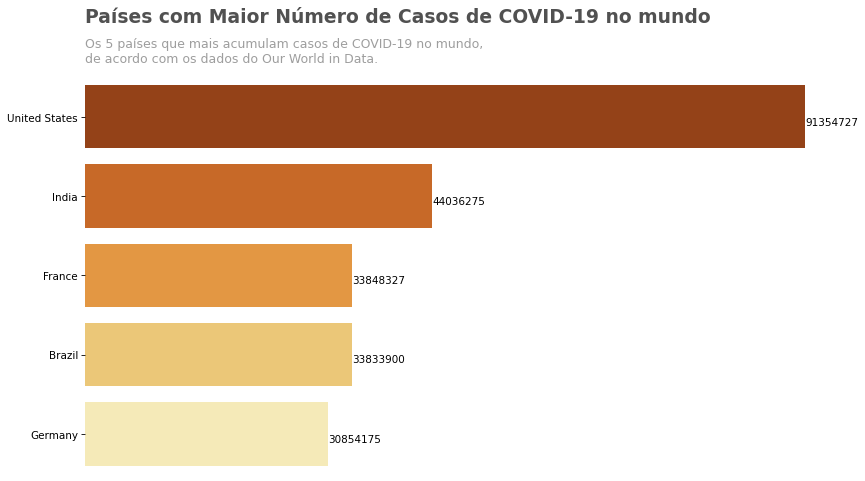

In [18]:
# configurar as cores que usarei no plot
AZUL, CINZA, CINZA_TEXTO, VERMELHO = "#003F5c","#9E9E9E","#515151","#FA2424" 

fig, ax = plt.subplots(figsize=(13,7),dpi=75)
n_plots=5
palette_cases = sns.color_palette("YlOrBr", n_colors=n_plots)
palette_cases.reverse()
with palette_cases:
  ax = sns.barplot(y='location' ,x='total_cases', data= top5_cases,ax=ax)


# removendo spines dos gráficos
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)  
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  

#remover titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

# remover xticks e xticklabels
  ax.set_xticklabels(labels=[], visible=False)
  ax.set_xticks(ticks=[])

#adicionar labels
  initialx=0
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1
 
# plotar título
  plt.text(-2, -1.2, 'Países com Maior Número de Casos de COVID-19 no mundo',
          fontsize=18, 
          color=CINZA_TEXTO,
          weight='bold')
   
# plotar subtitulo
  plt.text(-0.35, -1,
          "Os 5 países que mais acumulam casos de COVID-19 no mundo,\n"
          "de acordo com os dados do Our World in Data.",
          verticalalignment="top",
          fontsize=12,
          color=CINZA) 
 
  plt.show()

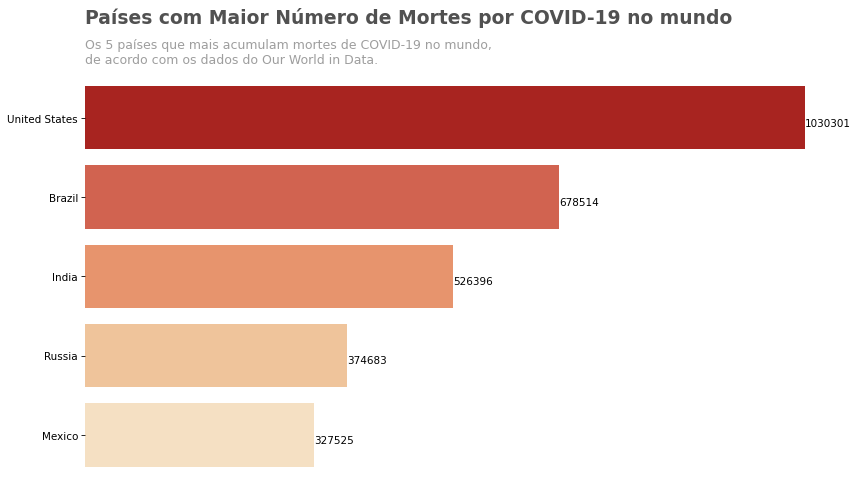

In [19]:
# configurar as cores que usarei no plot
AZUL, CINZA, CINZA_TEXTO, VERMELHO = "#003F5c","#9E9E9E","#515151","#FA2424" 

fig, ax = plt.subplots(figsize=(13,7),dpi=75)
n_plots=5
palette_cases = sns.color_palette("OrRd", n_colors=n_plots)
palette_cases.reverse()
with palette_cases:
  ax = sns.barplot(y='location' ,x='total_deaths', data= top5_deaths,ax=ax)


# removendo spines dos gráficos
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)  
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  

#remover titulos
  ax.set_ylabel('')    
  ax.set_xlabel('')

# remover xticks e xticklabels
  ax.set_xticklabels(labels=[], visible=False)
  ax.set_xticks(ticks=[])
  

#adicionar labels
  initialx=0
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1

# plotar título
  plt.text(-2, -1.2, 'Países com Maior Número de Mortes por COVID-19 no mundo',
          fontsize=18, 
          color=CINZA_TEXTO,
          weight='bold')
   
# plotar subtitulo
  plt.text(-0.35, -1,
          "Os 5 países que mais acumulam mortes de COVID-19 no mundo,\n"
          "de acordo com os dados do Our World in Data.",
          verticalalignment="top",
          fontsize=12,
          color=CINZA) 

  plt.show()

Nos gráficos acima podemos observar que os Estados Unidos, Brasil e Índia figuram tanto no ranking de total de casos quanto no ranking de total de mortes por COVID 19 em 31/07/2022.

#### Mapa COVID 19 utilizando a biblioteca Folium

Uma análise bastante interessante que pode ser feita com este banco de dados é o mapeamento de números da COVID 19 no mundo todo utilizando a biblioteca Folium. A biblioteca nos permite manipular os dados de nosso dataset usando linguagem de programação e visualizar o resultado em um mapa interativo, de forma quase que imediata.

Importamos a biblioteca no início deste notebook através do import folium. Isto, claro, depois de instalarmos o pacote em nosso ambiente, que em nosso caso foi feito através do pip install folium.

Feito isso, iremos criar uma variável, nomeada mapa, para criar o primeiro mapa, sem sobreposiçao de imagens e sem nenhuma base de dados atrelada. Isso é feito através do comando abaixo:

In [20]:
#MAP
mapa = folium.Map(
    width='100%',
    height='100%',
    zoom_start=6
    )

In [21]:
mapa

Feito isso, iremos adequar nossa base de dados que será utilizada neste mapa. Vamos analisar o total de mortes por COVID 19 em uma determinada data e, como critério, iremos utilizar o último mês com informações disponíveis, que, no momento em que estamos fazendo este trabalho é o mês de Julho de 2022.
Assim como foi feito na análise anterior para o ranking de total de casos e total de mortes, iremos utilizar apenas as informaçoes de cada país, desconsiderando o total por continente e total pelo mundo. A adequação da base foi feita logo abaixo.

In [22]:
dados = df.loc[df.date == '2022-06-30',['continent','location', 'date', 'total_deaths']].dropna(subset=['continent'])
dados

,continent,location,date,total_deaths
857,Asia,Afghanistan,2022-06-30,7723.0
2695,Europe,Albania,2022-06-30,3500.0
3608,Africa,Algeria,2022-06-30,6875.0
4515,Europe,Andorra,2022-06-30,153.0
5404,Africa,Angola,2022-06-30,1900.0
...,...,...,...,...
207037,Asia,Vietnam,2022-06-30,43087.0
207713,Oceania,Wallis and Futuna,2022-06-30,7.0
209529,Asia,Yemen,2022-06-30,2149.0
210420,Africa,Zambia,2022-06-30,4006.0


Abaixo, verificamos a quantidade de dados nulos em nossa base, por coluna. Para fazer esse mapeamento iremos preencher com zero esses valores nulos. Até mesmo porque os dados nulos, que em nosso caso são apenas 11, pouco representam em relação ao total.

In [23]:
dados.isnull().sum()

continent        0
location         0
date             0
total_deaths    12
dtype: int64

In [24]:
dados.loc[dados.total_deaths.isnull(), 'total_deaths'] = 0

In [25]:
dados.isnull().sum()

continent       0
location        0
date            0
total_deaths    0
dtype: int64

O primeiro mapa plotado é apenas a primeira camada exibida, sem utilização de nenhuma base de dados. Para trabalharmos com os nossos dados no mapa precisamos utilizar alguns artifícios, que irão fazer os desenhos de cada país, e preencher com as informações. Nosso intuito é apresentar um mapa com cores cuja intensidades variam de acordo com o número de mortes por COVID 19, seguindo uma determinada escala de cores estabelecida. Para isso, basicamente precisamos criar uma nova camada que irá fazer o desenho dos mapas.

Para essa finalidade iremos utilizar um documento, em formato .json, que possui uma série de comandos, informações e coordenadas geográficas de cada país. Esse arquivo que fará este trabalho em nosso mapa, adicionando uma nova camada com o desenho de cada país, que será preenchido de acordo com os números da COVID analisados.

Utilizamos [este documento](https://raw.githubusercontent.com/jdamiani27/Data-Visualization-and-D3/master/lesson4/world_countries.json) em nosso trabalho. Baixamos o arquivo em nossa máquina, e renomeamos para *world_countriesv2.json*.

Abaixo realizamos a leitura deste arquivo e atribuímos essas informaçoes à variável geo_json_data.

In [26]:
# abrindo o arquivo json salvo no dropbox
world_data_json = "/content/sample_data/world_countriesv2.json"
geo_json_data = json.load(open(world_data_json))
#geo_json_data = json.load(open(world_data_json))

In [27]:
# visualizando o arquivo.
#geo_json_data

Visualizando o arquivo geo_json_data, verificamos que cada país tem seu nome identificado dentro de features e properties, conforme estrutura da documentação. O que iremos fazer agora é linkar o nome do país em nosso dataset com o nome do país que consta neste arquivo json. Isso é feito através do parâmetro *key_on*, documentado abaixo, no comando utilizado para plotar este gráfico. Detalhe importante, é o que o nome do país do arquivo json deve ser exatamente o nome do país em nossa base de dados. Caso contrário, o mapa não fará este link e as informações dos países divergentes não serão divulgadas no mapa.

Feita esta leitura do arquivo json, e após análise prévia das informações, iremos plotar o novo mapa, desta vez vinculando nossos dados, através do método choropleth. Nele iremos vincular os dados das coordenadas geográficas, que são as informações do arquivo em json, nossa base de dados que será utilizada, as colunas que contém as informações do nosso datase, assim como cores da escala, níveis de opacidade destas cores e nome das legendas, vide comandos abaixo:

In [28]:
# escala normal
mapa.choropleth(
    geo_data = geo_json_data, # dados das coordenadas geográficas
    caption = 'MORTES POR COVID 19', # título do mapa
    data = dados, # base de dados utilizada
    columns = ['location', 'total_deaths'],# colunas com informações utilizadas
    key_on = 'feature.properties.name', # em qual estrutura do arquivo json se encontra as informações com o nome dos países, para vincular com a base de dados
    fill_color = 'Reds', # escala de cores
    fill_opacity = 0.5, # opacidade das cores
    line_color = 'white',# cor da linha dos mapas
    line_opacity = 0.5, # opacidade das cores das linhas
    show = True, # quandro True, cria uma camada que sobrepõe a camada inicial do mapa
    legend_name = 'Mortes por COVID 19 no mundo' # nome das legendas
)

Logo após, iremos plotar o mapa, chamando a variável "mapa" que foi criada.

In [29]:
mapa

Analisando o mapa, fica evidente que devem ser realizados ajustes na visualização destes dados. Os países que apresentam um número maior de mortes por COVID 19, (Estados Unidos, Brasil, Índia e Rússia) são facilmente identificados e se destoam dos demais países, sendo que os restantes são nivelados utilizando praticamente uma mesma tonalidade da escala.

Isso ocorre pois os valores dos países com mais representatividade, sobretudo os Estados Unidos, são valores muito altos de mortes por covid, criando uma distorção significativa em nossa escala. A escala utilizada é a aritmética, e corresponde aos números exatos de nossa base de dados. Para corrigir essa visualização iremos transformar estes dados em escala logarítmica visando reduzir a escala e ajustar melhor essas informações. O logaritmo reduz a representação a uma escala mais fácil de ser representada e visualizada e pode ajudar a revelar mais detalhes nas informações de um gráfico, ou função.

Para fazer esta conversão, iremos utilizar o método do numpy np.log, passando por parâmetro as informações da coluna total_deaths. Iremos também somar 1, ao final deste comando, para que país com informações zeradas não interfiram e não impossibilitem nossa visualização.

In [30]:
# escala logaritmca
dados['log_deaths'] = np.log(dados['total_deaths']+1)
dados.sort_values(by='log_deaths', ascending=False)

,continent,location,date,total_deaths,log_deaths
200084,North America,United States,2022-06-30,1017567.0,13.832926
27176,South America,Brazil,2022-06-30,671416.0,13.417146
87953,Asia,India,2022-06-30,525139.0,13.171420
157726,Europe,Russia,2022-06-30,373404.0,12.830419
123381,North America,Mexico,2022-06-30,325716.0,12.693784
...,...,...,...,...,...
205196,Europe,Vatican,2022-06-30,0.0,0.000000
78885,Europe,Guernsey,2022-06-30,0.0,0.000000
132555,Oceania,Nauru,2022-06-30,0.0,0.000000
159339,Africa,Saint Helena,2022-06-30,0.0,0.000000


Feita a conversão para escalas logarítmicas, iremos executar novamente o método choropleth. Mas desta vez iremos indicar em columns as colunas location, como no plot anterior, e a coluna log_deaths, que apresenta o número de mortes por COVID 19 convertido para logaritmo. Vide comandos abaixo:

In [31]:
# explicar método
mapa.choropleth(
    geo_data = geo_json_data,
    name = 'MORTES POR COVID 19',
    data = dados,
    columns = ['location', 'log_deaths'],
    key_on = 'feature.properties.name',
    fill_color = 'Reds',
    fill_opacity = 0.5,
    line_color = 'white',
    line_opacity = 0.5,
    show = True,
)

Plotando novamente o mapa, chamando a variável "mapa" que foi criada:

In [32]:
mapa

O resultado acima já apresenta uma melhor visualização dos dados. Podemos ver que os países com número maior de mortes por COVID 19, (Estados Unidos, Brasil, Índia e Rússia) continuam se destacando dos demais, Mas os outros países apresentam escalas de cores melhor ajustadas. Isso nos permite identificar, por exemplo, que na América do Sul,além do Brasil, Peru, Colômbia e Argentina também apresentam números relevantes de mortes por COVID 19, comparados aos demais do continente. Na América Central, o México é o país com maior número óbitos. Na europa, os índices da Espanha, França, Alemanha, Reino Unido, Polônia são os maiores. No continente africano, África do Sul e Egito são um dos que mais se destacam. No continente asiático, além de Rússia e Índia, Indonésia e Irã também apresentam números relevantes, que pode ser notado pela diferenciação na escala, em relação aos demais. Estados Unidos é o país com tonalidade mais escura, sendo o que apresenta número maior de óbitos.

#### Bar chart race

Uma ferramenta de análise bastante interessante que pode ser utilizada em nosso dataset é o *bar chart race*. Se trata de um pacote para o Pandas, bem recente inclusive, que faz uma animação de gráficos de barras, em que estas barras vão se ultrapassando com a evolução dos números. É uma análise através de gráficos de barras que adiciona o elemento de evolução histórica por um período determinado, complementando ainda mais nossas análises.

Esse pacote foi criado pelo Teddy Petrou, nome de extrema relevância na área de *data science*. Como consulta iremos utilizar a própria documentação do bar chart race, disponível através deste [link](https://www.dexplo.org/bar_chart_race/). Inclusive, na documentação o Teddy Petrou utiliza dados da COVID 19 em seu *bar chart race*.

Logicamente a primeira etapa é a instalação do pacote por meio do próprio pip install bar_chart_race.

Seguindo o que consta na documentação, é recomendado que sejam feitas algumas adequações na exibiçao dos dados, que serão plotados no *bar chart race*. Devemos criar um dataframe onde: cada linha deve representar um único período de tempo; cada coluna deve conter o valor de uma categoria específica, e o índice deve conter o componente de tempo. Na documentação ele mostra um exemplo de dados formatados corretamente para este plot.

Portanto, após a instalação do pacote, precisamos adequar nossa base de dados. Iremos analisar a evolução do número de óbitos por COVID 19, partindo do primeiro óbito até o número da data atual.

Assim como feito em análises anteriores, iremos utilizar apenas as informaçoes de cada país, desconsiderando os totais por continente e total pelo mundo. A adequação da base foi feita logo abaixo.

In [33]:
# Ao agruparmos por país, verificamos que existem dados cumulativos na nossa base de dados, com localização world, europe, etc.
df.groupby(['location']).new_deaths.sum().sort_values(ascending=False)

location
World                           6443374.0
Upper middle income             2543104.0
High income                     2539864.0
Europe                          1922178.0
North America                   1487623.0
                                  ...    
Northern Mariana Islands              0.0
United States Virgin Islands          0.0
Tuvalu                                0.0
Nauru                                 0.0
Sint Maarten (Dutch part)             0.0
Name: new_deaths, Length: 244, dtype: float64

In [34]:
# base considerando apenas os dados de cada país, eliminando os que não tem informação na variável 'continent'
# dessa forma, as localizações world, europe, entre outras, foram eliminadas, restando apenas os países
df_ajustado = df.dropna(subset=['continent'])
df_ajustado.groupby(['location']).new_deaths.sum().sort_values(ascending=False)

location
United States    1043618.0
Brazil            683316.0
India             520183.0
Russia            376052.0
Mexico            322244.0
                   ...    
Puerto Rico            0.0
Saint Helena           0.0
Tuvalu                 0.0
Turkmenistan           0.0
Guam                   0.0
Name: new_deaths, Length: 231, dtype: float64

Conforme documentação, cada linha do nosso dataframe deve representar um único período de tempo. Para isso, vamos criar uma variável df_ajustado_fim, que irá apresentar apenas os dados do último dia de cada vez, que filtramos pelo método dt.is_month_end.

Feito isso, agrupamos por país e por data, retornando os valores da coluna total_deaths. Convertemos o resultado gerado de series para um objeto dataframe, através do pd.DataFrame. Logo após, utilizamos o método unstack() para remodelar nossos dados. Também utilizamos o transpose, através do .T, para transpor nossos dados de linhas para colunas. Por último removemos a primeira coluna do nosso dataframe, que não será utilizada em nossa análise, através do droplevel(level=0).

O resultado final foi armazenado na variável df_bcr, conforme documentado abaixo:

In [35]:
# df ajustado retornando apenas os dados do último dia de cada mês
# fazemos um agrupamento utilizando o groupby df.groupby(["location", "date"]).sum()
# consideramos apenas a coluna total deaths df.groupby(["location", "date"]).sum().total_deaths
# convertemos de series para dataframe pd.DataFrame(df.groupby(["location", "date"]).sum().total_deaths)
# desempilhamos os dados, utilizando o método .unstack()
# eliminamos os dados nulos com método fillna(0)
# invertemos as colunas com linhas com o método .T
# removemos a coluna total_deaths com o método .droplevel(level=0)

df_ajustado_fim = df_ajustado[df_ajustado['date'].dt.is_month_end]
df_bcr = pd.DataFrame(df_ajustado_fim.groupby(['location', 'date']).sum()['total_deaths']).unstack().fillna(0).T.droplevel(level=0)
df_bcr

location,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Curacao,Cyprus,Czechia,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Faeroe Islands,Falkland Islands,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guam,Guatemala,Guernsey,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,Kiribati,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (country),Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,North Korea,North Macedonia,Northern Cyprus,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Pitcairn,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2835.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Por fim, após realizados os ajustes de adequaação da nossa base de dados, obedecendo o que consta na documentação, basta utilizarmos a função principal, bar_chart_race, passando os parâmetros exatamente como são mostrados pelo Teddy Petrou, conforme documentado abaixo.

In [36]:
bcr.bar_chart_race(
    df=df_bcr,
    filename=None,
    orientation='h',
    sort='desc',
    n_bars=10, #incluir 10, para trazer informações agrupada por 10 países
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='seismic',
    title='COVID-19 - Mortes por país',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)

O resultado acima nos mostra a evolução de óbitos por COVID 19, por país, partindo do início de 2020 até os dias atuais. No gráfico nós exibimos os dez países com maior representatividade, que vão se alternando e tendo as barras ultrapassadas à medida que os números evoluem. 

#### Scatter plot (Gráfico de dispersão) - PIB e total de mortes por COVID 19

Conforme Juliana Scudiilio, em seu ótimo artigo "Scatter plot: Um Guia Completo para Gráficos de Dispersão" que pode ser acessado através deste [link](https://www.flai.com.br/juscudilio/scatter-plot-um-guia-completo-para-graficos-de-dispersao/), os gráficos de dispersão ou Scatter plot são representações gráficas do relacionamento entre duas variáveis numéricas. O Scatter plot utiliza pontos para representar essa relação, cada ponto representa o valor de uma variável no eixo horizontal e o valor de outra variável no eixo vertical.

Descrito por Francis Galton, o Scatter plot é usado para verificar se existe uma relação entre causa e efeito entre duas variáveis numéricas. isso não significa que uma variável causa efeito na outra, mas apenas se existe uma relação e qual intensidade entre essa relação. A relação entre duas variáveis pode ser positiva, negativa ou neutra, linear ou não linear.

Tendo esses conceitos definidos e nos atentando ao fato de que uma variável não necessariamente causa efeito na outra, primeiramente vamos plotar um scatter plot relacionando PIB per capita pelo índice de desenvolvimento humano de cada país, conforme documentado abaixo.

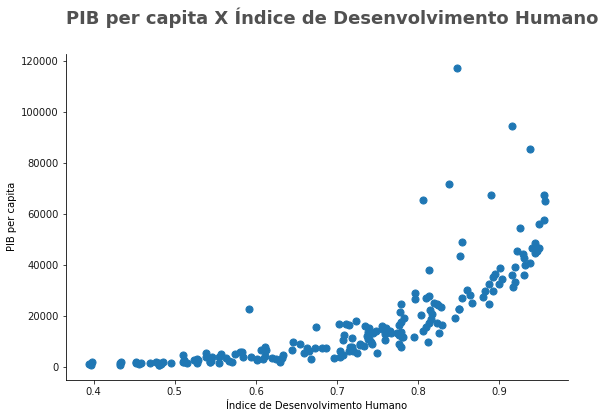

In [254]:
df2 = df.loc[(df.date == '2021-12-31')].dropna(subset=['human_development_index','gdp_per_capita','continent'])
fig, ax = plt.subplots(figsize=(9,6))
df2.plot.scatter(x='human_development_index', y='gdp_per_capita',ax=ax,s=50)
ax.set_title("PIB per capita X Índice de Desenvolvimento Humano",
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=18,
             color=CINZA_TEXTO)
ax.set_ylabel("PIB per capita")
ax.set_xlabel("Índice de Desenvolvimento Humano")

# remover spines da direita e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Embora o comportamento de uma variável não implique ou cause efeito na outra, fica claro no plot acima que quanto maior o PIB per capita de um país maior tende a ser o seu índice de desenvolvimento humano. Ou seja, existe uma certa correlação positiva entre estas variáveis. Este gráfico foi plotado para ilustrar esse comportamento.

Agora plotaremos abaixo os gráficos de dispersão considerando os dados do PIB de cada país em 2020, 2021 e 2022 e o número total de mortes por COVID 19. Como os dados do PIB não se alteram com a data, e, em tese, são atualizados anualmente, fizemos uma análise considerando o total acumulado de mortes em três datas: 31/12/2020, 31/12/2021 e 31/07/2022. Ou seja, estamos considerando o total de mortes por COVID 19 por país, ao final de 2020, 2021 e no mês de Julho de 2022 e comparando o PIB per capita do país, afim de analisarmos se existe alguma correlação entre essas duas variáveis.

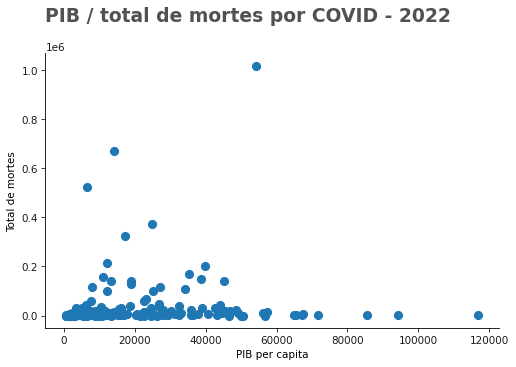

In [250]:
# PIB scatter plot


df2022 = df.loc[(df.date == '2022-06-30')]
df2022PIB = df2022.dropna(subset=['gdp_per_capita', 'total_deaths', 'continent'])

fig, ax = plt.subplots(figsize=(7,5),dpi=75)

ax = df2022PIB.plot.scatter(x='gdp_per_capita', y='total_deaths', s=60, ax=ax)
ax.set_title('PIB / total de mortes por COVID - 2022',
             loc='left',
             pad=30,
             weight = 'bold',
             fontsize=18,
             color=CINZA_TEXTO)
ax.set_ylabel("Total de mortes")
ax.set_xlabel("PIB per capita")

# remover spines da direita e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout();

Nos gráficos acima verificamos que não existe relação entre o comportamento da variável PIB per capita e o número total de mortes por COVID 19 e uma variável não causa efeito na outra. Ou seja, o número total de mortes não aumenta conforme diminui o PIB per capita, e nem diminui conforme aumenta o PIB do país . Mas o gráfico acima nos pode ser útil para identificar outros padrões nos dados, como outliers.

Primeiramente, percebemos que o número do PIB não altera de um ano para o outro, ou seja, este dado em nosso dataset não está atualizado. Mas podemos identificar outliers, de países com elevados índices de PIB per Capita. Abaixo localizamos esses países em nosso dataframe. Verificamos que o Qatar possui o maior PIB per capita e apresenta o total de mortes reportados em 2022 de 679 óbitos. Seguido por Luxemburgo que mostra um total de 1094 óbitos,  Singapura com 1413 óbitos, Brunei com 225 óbitos e Irlanda com 7499 óbitos. Evidentemente, o número que mais chama a atenção é o do Qatar. O Qatar, um país muito rico com grandes reservas de gás, investiu muito no sistema de saúde, tendo um dos melhores sistemas de saúdes do mundo. A população de trabalhadores migrantes muito jovens também favoreceu um dos menores números de mortes do mundo, segundo especialistas. Analisando o outro extremo do PIB, percebemos que os países com menor PIB per_capita são em sua maioria do continente africano, e eles apresentam baixos números de óbitos por COVID 19. O motivo do baixo número de óbitos por COVID 19 no continente, pode estar relacionado à idade média dos africanos, que são muito jovens, ou seja, menos pessoas, comparativamente, viveram o suficiente para desenvolver problemas de saúde que podem aumentar drasticamente o risco de doenças graves e morte por covid. Além disso, para outros especialistas da força tarefa da COVID 19 boa parte da população africana não foi ao hospital mesmo com sintomas da doença, o que afeta os números oficiais.

Analisando o eixo y do nosso scatter plot, ou seja, o total de mortes por COVID, verificamos que os Estados Unidos, com o maior números de óbitos no mundo, apresentam um dos maiores PIB per capita. O país é um dos que mais sofrem com o problema da vacinação contra a Covid-19, pois uma grande parte da população ainda recusa a imunização, embora pesquisas evidenciem o que, apesar de as vacinas não evitarem o contágio do vírus, elas diminuem drasticamente o risco de óbito pela doença.

In [39]:
df2022PIB[['location', 'gdp_per_capita', 'total_deaths', 'total_cases']].sort_values(by='gdp_per_capita', ascending=False)

,location,gdp_per_capita,total_deaths,total_cases
155876,Qatar,116935.600,679.0,382635.0
113436,Luxembourg,94277.965,1094.0,263387.0
170760,Singapore,85535.383,1413.0,1444068.0
28957,Brunei,71809.251,225.0,163900.0
92533,Ireland,67335.293,7499.0,1600614.0
...,...,...,...,...
137944,Niger,926.000,310.0,9031.0
50177,Democratic Republic of Congo,808.133,1371.0,91082.0
107960,Liberia,752.788,294.0,7497.0
31635,Burundi,702.225,38.0,42658.0


In [40]:
df2022PIB[['location', 'gdp_per_capita', 'total_deaths', 'total_cases']].sort_values(by='total_deaths', ascending=False)

,location,gdp_per_capita,total_deaths,total_cases
200084,United States,54225.446,1017567.0,87675680.0
27176,Brazil,14103.452,671416.0,32358018.0
87953,India,6426.674,525139.0,43469234.0
157726,Russia,24765.954,373404.0,18161238.0
123381,Mexico,17336.469,325716.0,6034602.0
...,...,...,...,...
22707,Bhutan,8708.597,21.0,59729.0
204293,Vanuatu,2921.909,14.0,11266.0
100819,Kiribati,1981.132,13.0,3236.0
191062,Tonga,5425.621,12.0,12301.0


#### Scatter plot (Gráfico de dispersão) - Diabetes e total de mortes  por COVID 19 por milhão de pessoas

Conforme consta [neste artigo](https://drauziovarella.uol.com.br/drauzio/artigos/diabetes-e-covid-artigo/) do Dr. Drauzio Varella, desde o início da pandemia, ficou claro que pessoas com diabetes corriam risco de apresentar as formas mais graves da covid. Logo em maio de 2020, a revista “The Lancet Diabetes & Endocrinology” publicou uma série de recomendações para os cuidados que os médicos deviam ter com os pacientes com diabetes, durante a pandemia. O Dr. Drauzio Varella nos passa a informação de que esta mesma revista avaliou o risco de morte em pessoas com diabetes ao contrair o Sars-CoV-2. Depois de ajustar estatisticamente fatores como sexo, idade, etnia, região geográfica e situação econômico-financeira, foi demonstrado que pacientes com diabetes do tipo 1 correm risco de morte 3,5 vezes mais alto do que aqueles com covid, mas sem diabetes.

Levando em consideração esses apontamentos, plotamos abaixo um scatter plot com as variáveis de prevalência de diabetes (diabetes_prevalence) do país e o número total de mortes por covid, por milhão de pessoas (total_deaths_per_million).

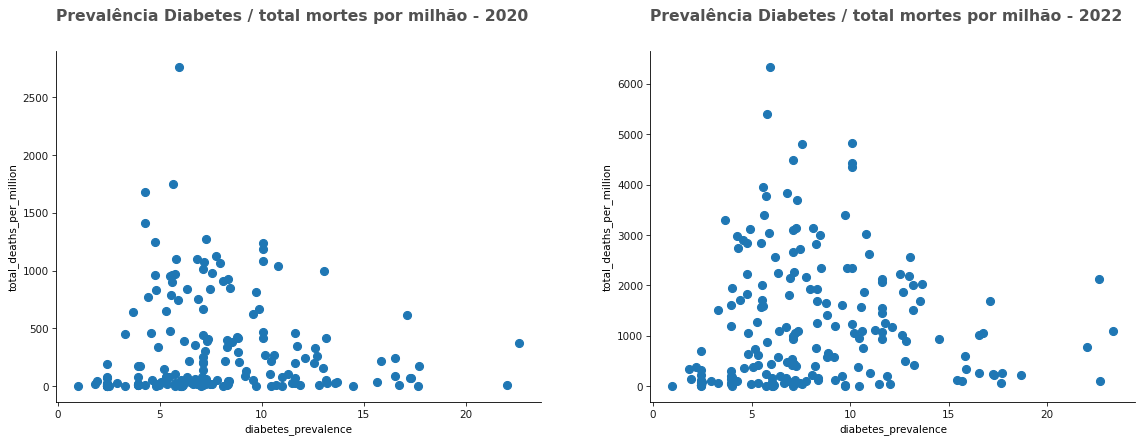

In [247]:
# Diabetes scatter plot

df2020Diab = df.loc[(df.date == '2020-12-31')].dropna(subset=['continent', 'diabetes_prevalence', 'total_deaths_per_million'])
df2022Diab = df.loc[(df.date == '2022-06-30')].dropna(subset=['continent', 'diabetes_prevalence', 'total_deaths_per_million'])

fig, ax = plt.subplots(1,2,figsize=(16,6),dpi=75)

ax[0] = df2020Diab.plot.scatter(x='diabetes_prevalence', y='total_deaths_per_million', ax=ax[0], s=60)
ax[0].set_title('Prevalência Diabetes / total mortes por milhão - 2020',
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=15,
                color=CINZA_TEXTO)

ax[1] = df2022Diab.plot.scatter(x='diabetes_prevalence', y='total_deaths_per_million', ax=ax[1],s=60)
ax[1].set_title('Prevalência Diabetes / total mortes por milhão - 2022',
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=15,
                color=CINZA_TEXTO)

# remover spines da direita e superior
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
plt.tight_layout();

Nos gráficos acima, observamos que uma variável não necessariamente causa efeito na outra. Mas é interessante analisarmos, que, embora essa correlação não seja positiva, para alguns dados, podemos verificar que quanto maior o índice de prevalência de diabetes, maior é o total de mortes por Covid. Ressaltamos novamente que esse relação não é direta e o gráfico não mostra nenhuma relação positiva clara, mas para alguns casos vale esta observação, que em partes corrobora com as informações documentadas acima.

#### Scatter plot (Gráfico de dispersão) - taxa de mortalidade por doença cardiovascular  e total de mortes  por COVID 19 por milhão de pessoas

Pessoas com doenças cardiovasculares ou cardíacas estão entre os grupos mais vulneráveis a complicações da Covid-19, causada pelo novo coronavírus. A Organização Mundial da Saúde (OMS) aponta que pacientes com doenças do coração ou nos vasos sanguíneos podem desenvolver mais complicações do que quem está saudável.

Levando em consideração esses apontamentos, plotamos abaixo um scatter plot com as variáveis de taxa de mortalidade por doença cardiovascular (cardiovasc_death_rate) e o número total de mortes por covid, por milhão de pessoas (total_deaths_per_million).

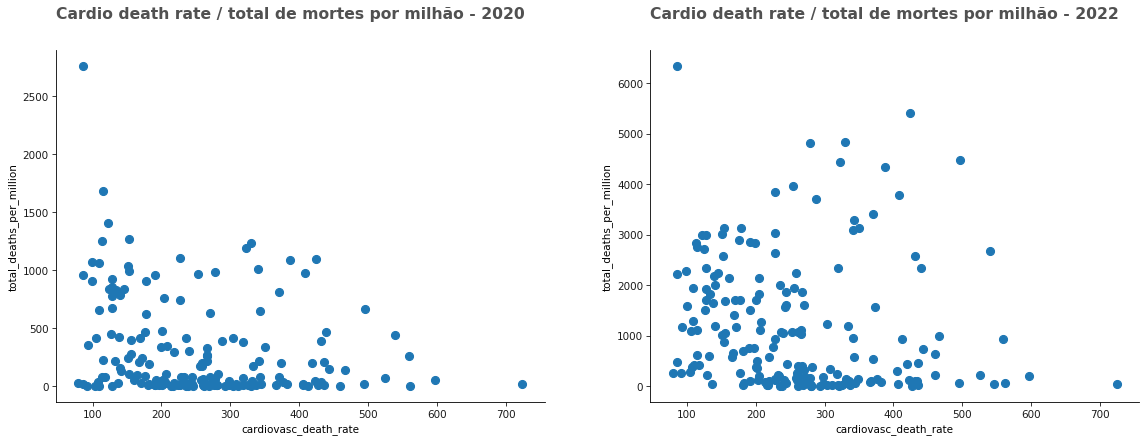

In [245]:
# Cardiovascular scatter plot

df2020Card = df.loc[(df.date == '2020-12-31')].dropna(subset=['continent', 'cardiovasc_death_rate', 'total_deaths_per_million'])
df2022Card = df.loc[(df.date == '2022-06-30')].dropna(subset=['continent', 'cardiovasc_death_rate', 'total_deaths_per_million'])

fig, ax = plt.subplots(1,2,figsize=(16,6),dpi=75)

ax[0] = df2020Card.plot.scatter(x='cardiovasc_death_rate', y='total_deaths_per_million', ax=ax[0], s=60)
ax[0].set_title('Cardio death rate / total de mortes por milhão - 2020',
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=15,
                color=CINZA_TEXTO)

ax[1] = df2022Card.plot.scatter(x='cardiovasc_death_rate', y='total_deaths_per_million', ax=ax[1], s=60)
ax[1].set_title('Cardio death rate / total de mortes por milhão - 2022',
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=15,
                color=CINZA_TEXTO)

# remover spines da direita e superior
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout();


Assim como nos gráficos de prevalência de diabetes, observamos que o comportamento dos dados são semelhantes, ou seja uma variável não necessariamente causa efeito na outra. Mas é interessante analisarmos, que, embora essa correlação não seja positiva, para alguns dados, podemos verificar que quanto maior o índice de taxa de mortalidade por doença cardiovascular, maior  tende a ser o total de mortes por Covid. Ressaltamos novamente que esse relação não é direta e o gráfico não mostra nenhuma relação positiva clara, mas para alguns casos vale esta observação, que em partes corrobora com as informações documentadas acima.

#### Análise da evolução do total de óbitos e total de vacinações, por mês

Logo abaixo, plotamos dois gráficos de linha que mostram e evolução de óbitos, sumarizados por mês, desde o início da pandemia até os dias atuais, e a evolução do número de total de novas doses de vacina da COVID-19 administradas, também sumarizadas por mês para este mesmo período. Para fazer este agrupamento, logo após transformarmos em datetime a coluna date, com o formato específico, agrupamos nosso dataset utilizando o método pandas pd.Grouper e estabelecemos freq='M', o que ordenará nossos dados de forma sumarizada, por mês. Vide códigos abaixo:


In [43]:
# Analise de total de mortes por mês, por Covid 19, e total de vacinações por mês, nível global

df.head()
df.index = pd.to_datetime(df['date'],format='%m/%d/%y %I:%M%p')

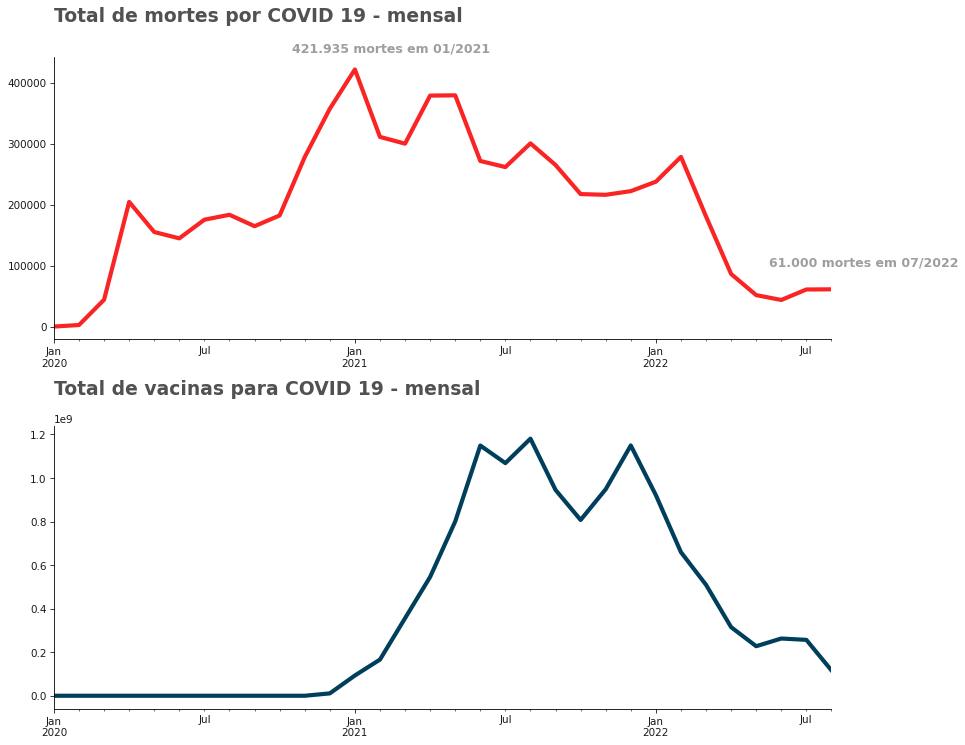

In [234]:
# configurar as cores que usarei no plot
AZUL, CINZA, CINZA_TEXTO, VERMELHO = "#003F5c","#9E9E9E","#515151","#FA2424" 

fig, ax = plt.subplots(2,1, figsize=(13,10),dpi=75);


ax[0] = pd.DataFrame(df.loc[df.location == 'World'].groupby(pd.Grouper(freq='M')).new_deaths.sum()).plot(ax=ax[0],color=VERMELHO,linewidth=4)

ax[1] = pd.DataFrame(df.loc[df.location == 'World'].groupby(pd.Grouper(freq='M')).new_vaccinations.sum()).plot(ax=ax[1],color=AZUL,linewidth=4);
ax[1].set_title("Total de vacinas para COVID 19 - mensal",
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=18,
                color=CINZA_TEXTO)

# remover spines da direita e superior
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

# removendo legendas
ax[0].get_legend().remove()
ax[1].get_legend().remove()

#remover titulos
ax[0].set_xlabel('')    
ax[1].set_xlabel('')


# plotar título
ax[0].text(600, 500000, 'Total de mortes por COVID 19 - mensal',
         fontsize=18, 
         color=CINZA_TEXTO,
         weight='bold')

# incluindo comentario no gráfico
ax[0].text(609.5,450000,'421.935 mortes em 01/2021',
           fontsize=12,
           color=CINZA,
           weight='bold')

ax[0].text(628.5,100000,'61.000 mortes em 07/2022',
           fontsize=12,
           color=CINZA,
           weight='bold')

plt.tight_layout();

Nos gráficos plotados acima é possível perceber que o número de óbitos apresentava uma ascenção cada vez mais elevada até Janeiro de 2021, diminuindo a partir deste mesmo mês. Os gráficos nos mostram que essa queda, ocorre à partir do aumento número total de novas doses de vacina da COVID-19 administradas.Importante ressaltar que estamos considerando apenas as novas doses mensais das vacinas, desconsiderando dados dos totalmente imunizados ou o total doses administradas além do número prescrito pelo protocolo inicial de vacinação.

#### Análise da evolução do total de óbitos

Abaixo plotamos um gráfico de linha para demonstrar e evolução de mortes e evolução de casos no mundo.

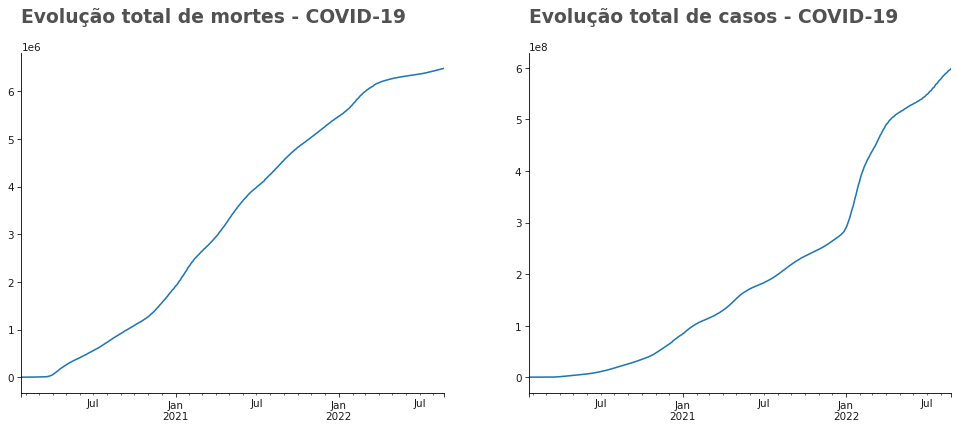

In [233]:
#gráficos de linha em escalas linear para os casos totais e mortes totais.

fig, ax = plt.subplots(1,2, figsize=(16,6),dpi=75)

ax[0] = df.loc[df.location == 'World', 'total_deaths'].plot(x='date', y='total_deaths',ax=ax[0])
ax[0].set_title("Evolução total de mortes - COVID-19",
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=18,
                color=CINZA_TEXTO)

ax[1] = df.loc[df.location == 'World', 'total_cases'].plot(x='date', y='total_cases',ax=ax[1])
ax[1].set_title("Evolução total de casos - COVID-19",
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=18,
                color=CINZA_TEXTO)
#remover titulos
ax[0].set_xlabel('')    
ax[1].set_xlabel('')

# remover spines da direita e superior
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

O primeiro gráfico nos mostra que o total de mortes cresceu aceleradamente em 2021 e, a partir de 2022 já se encontra mais estável. O segundo gráfico mostra que o total de casos de covid continua aumentando, e em 2022 continua em ascensão.

### Análise exploratória dos dados no Brasil

Agora que já temos uma noção dos acontecimentos no mundo, vamos fazer uma breve análise dos acontecimentos no Brasil.

In [46]:
# Criar uma cópia do DataFrame apenas com o Brasil
dfBrasil = df.loc[df.location == "Brazil"].copy()

dfBrasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,214326223.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-27,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,214326223.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-28,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,214326223.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-29,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,214326223.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.891915
2020-03-01,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,214326223.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [47]:
dfBrasil.date.max()

Timestamp('2022-08-25 00:00:00')

Acima, verificamos que nosso dataset inclui datas a partir de **26/02/2020** até os dias atuais.

Vamos verificar quando foram identificados o primeiro caso e a primeira morte no Brasil.

#### Identificação do primeiro caso e primeiro óbito por COVID 19 no Brasil

In [48]:
# identificação da primeira morte
first_death = dfBrasil.loc[dfBrasil['new_deaths'] != 0.0].reset_index(drop=True).dropna(subset=['new_deaths']).head(1)
print('A primeira morte foi registrada em {}'.format(first_death.date.loc[20]))

A primeira morte foi registrada em 2020-03-17 00:00:00


In [49]:
# identificaçãso do primeiro caso
first_case = dfBrasil.loc[dfBrasil['new_cases'] != 0.0].reset_index(drop=True).dropna(subset=['new_cases']).head(1)
print('O primeiro caso foi registrado em {}'.format(first_case.date.loc[0]))

O primeiro caso foi registrado em 2020-02-26 00:00:00


In [50]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
from datetime import date
delta = first_death.date.loc[20] - first_case.date.loc[0]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 20 dias entre o primeiro caso e a primeira morte no Brasil.


Conforme documentado acima, o primeiro caso de COVID no Brasil, conforme informações do nosso dataset, foi registrado no dia 26/02/2020 e o primeiro óbito pela doença ocorreu no dia 17/03/2020, vinte dias após o primeiro regristro da doença no Brasil.

#### Análise da evolução do total de óbitos e total de vacinações no Brasil em 2021, por mês

Abaixo plotamos dois gráficos de linha que mostram e evolução de óbitos, sumarizados por mês, e a evolução do número de total de novas doses de vacina da COVID-19 administradas, também sumarizadas por mês. Essa análise segue os mesmos moldes do que foi realizado com os dados da COVID no mundo, mas, nesta análise do Brasil, iremos utilizar apenas os dados do ano de 2021, diferente da análise anterior que continha dados desde o início da pandemia até os dias atuais. Para isto, também agrupamos nosso dataset utilizando o método pandas pd.Grouper e estabelecemos freq='M', o que ordenará nossos dados de forma sumarizada, por mês. Vide códigos abaixo:

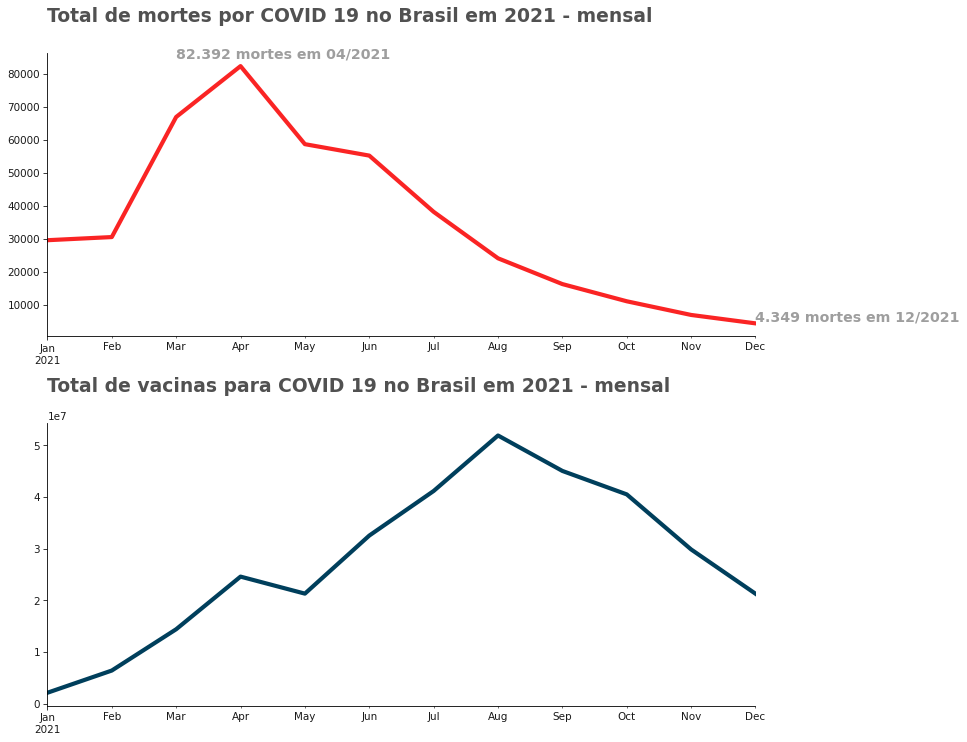

In [223]:
dfBrasil.index = pd.to_datetime(dfBrasil['date'],format='%m/%d/%y %I:%M%p')

dfBrasil2021 = dfBrasil.loc[(dfBrasil.date >= '2021-01-01')&(dfBrasil.date <= '2021-12-31')]

fig, ax = plt.subplots(2,1, figsize=(13,10),dpi=75);

ax[0] = dfBrasil2021.groupby(pd.Grouper(freq='M')).new_deaths.sum().plot(ax=ax[0], color=VERMELHO,linewidth=4);
ax[0].set_title("Total de mortes por COVID 19 no Brasil em 2021 - mensal",
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=18,
                color=CINZA_TEXTO)

ax[1] = dfBrasil2021.groupby(pd.Grouper(freq='M')).new_vaccinations.sum().plot(ax=ax[1],color=AZUL,linewidth=4);
ax[1].set_title("Total de vacinas para COVID 19 no Brasil em 2021 - mensal",
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=18,
                color=CINZA_TEXTO)

# remover spines da direita e superior
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


#remover titulos
ax[0].set_xlabel('')    
ax[1].set_xlabel('')

# incluindo comentario no gráfico
ax[0].text(614,85000,'82.392 mortes em 04/2021',
           fontsize=13.5,
           color=CINZA,
           weight='bold')

ax[0].text(623,5000,'4.349 mortes em 12/2021',
           fontsize=13.5,
           color=CINZA,
           weight='bold')

plt.tight_layout();

Nos gráficos plotados acima é possível perceber que o número de óbitos apresentava uma ascenção cada vez mais elevada até Março e Abril de 2021, diminuindo a partir deste mesmo mês. Os gráficos nos mostram que essa queda, ocorre à partir do aumento número total de novas doses de vacina da COVID-19 administradas. Comparando o intervalo de meses entre Abril/2021 e Agosto/2021, observamos comportamentos de certa forma inversamente proporcionais. O número de óbitos diminui à medida em que o número total de novas doses aumenta para este período. Importante ressaltar que estamos considerando apenas as novas doses mensais das vacinas, desconsiderando dados dos totalmente imunizados ou o total doses administradas além do número prescrito pelo protocolo inicial de vacinação.

#### Análise da evolução do total de óbitos

Por fim, plotamos um gráfico de linha para demonstrar e evolução de mortes e evolução de casos no Brasil.

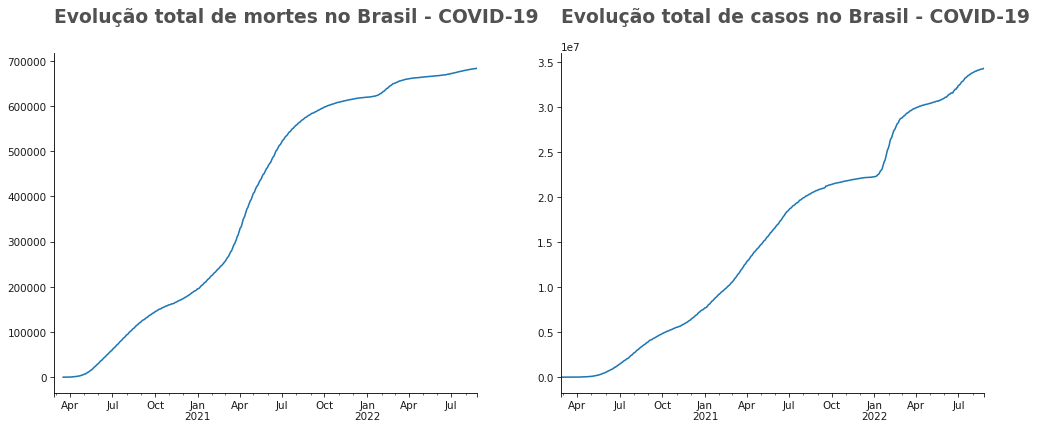

In [230]:
fig, ax = plt.subplots(1,2, figsize=(16,6),dpi=75)

ax[0] = dfBrasil.plot(x='date', y='total_deaths',ax=ax[0])
ax[0].set_title("Evolução total de mortes no Brasil - COVID-19",
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=18,
                color=CINZA_TEXTO)

ax[1] = dfBrasil.plot(x='date', y='total_cases',ax=ax[1])
ax[1].set_title("Evolução total de casos no Brasil - COVID-19",
                loc='left',
                pad=30,
                weight = 'bold',
                fontsize=18,
                color=CINZA_TEXTO)

#remover titulos
ax[0].set_xlabel('')    
ax[1].set_xlabel('')

# remover spines da direita e superior
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

# removendo legendas
ax[0].get_legend().remove()
ax[1].get_legend().remove();

O primeiro gráfico nos mostra que o total de mortes cresceu aceleradamente em 2021 e, a partir de 2022 já se encontra mais estável. O segundo gráfico mostra que o total de casos de covid continua aumentando, e em 2022 continua em ascensão.

# Conclusão


Antes de mais nada, é importante ressaltar que nenhuma das análises realizadas neste notebook podem ser consideradas conclusivas. Todo o trabalho foi realizado utilizando os dados do nosso dataset, sem nenhuma intervenção, ou conferência com dados divulgados pelos próprios países. Nenhum tipo de análise de proporção dos testes foi realizado e além disso, não fizemos nenhum teste para checar o grau de confiabilidades destas informações. E, conforme documentado logo acima, no início deste notebook, por se tratar de uma doença nova, recém descoberta, evidentemente nosso dataset pode apresentar países com dados estatísticos deficientes. Outro detalhe extremamente importante a ser destacado é que esses dados são medidos diariamente, e esse conjunto de dados poderá se desatualizar.

Entretanto, levando em consideração o contexto dos dados analisados, vale a pena destacar alguns pontos:

* Os Estados Unidos apresentam o maior número de óbitos por COVID-19, seguidos pelo pelo Brasil e também pela Índia.

* Nos dados analisados verificamos que, em alguns países,  quanto maior o índice de taxa de mortalidade por doença cardiovascular e a prevalência de diabetes maior tende a ser o total de mortes por Covid. Ressaltamos que esses fatores não afetam diretamente o total de mortes em todos os casos, e não apresentam comportamento forte de correlação positiva. Mas os dados apresentados nos gráficos corroboram de certa forma com os estudos envolvendo os grupos mais vulneráveis a complicações da Covid-19.

* Observamos também que ocorre uma queda no número de óbitos à partir do aumento número total de novas doses de vacina da COVID-19 administradas no mundo todo. Esses números corroboram com todos os estudos científicos que comprovam que a vacina é a nossa arma eficaz na guerra contra a Covid-19. 